Step 1: Libraries Import

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Graphs notebook mein show
%matplotlib inline

# Plot style
sns.set(style='whitegrid')


Step 2: Dataset Load

In [5]:
df = pd.read_csv('/content/enhanced_student_habits_performance_dataset.csv')


Step 3: Dataset Size or Column Names check

In [6]:
df.shape

(80000, 31)

In [7]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')

Step 4: Data Type Check

In [13]:
df.dtypes

,0
student_id,int64
age,int64
gender,category
major,category
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,category
attendance_percentage,float64
sleep_hours,float64


In [12]:
# Convert categorical columns to 'category' type
df['gender'] = df['gender'].astype('category')
df['major'] = df['major'].astype('category')
df['part_time_job'] = df['part_time_job'].astype('category')
df['parental_education_level'] = df['parental_education_level'].astype('category')
df['internet_quality'] = df['internet_quality'].astype('category')
df['extracurricular_participation'] = df['extracurricular_participation'].astype('category')
df['dropout_risk'] = df['dropout_risk'].astype('category')
df['study_environment'] = df['study_environment'].astype('category')
df['access_to_tutoring'] = df['access_to_tutoring'].astype('category')
df['family_income_range'] = df['family_income_range'].astype('category')
df['learning_style'] = df['learning_style'].astype('category')

# Convert 'diet_quality' to float64
df['diet_quality'] = pd.to_numeric(df['diet_quality'], errors='coerce')


Step 5: View the First 5 Rows

In [14]:
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


Step 6: Check for Missing Values

In [22]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
major,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0


In [21]:
df.drop(columns=['diet_quality'], inplace=True)


Step 7: Statistical Summary of Numerical Columns

In [23]:
df.describe()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,139999.500000,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,23094.155105,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,100000.000000,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,119999.750000,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,139999.500000,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,159999.250000,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,179999.000000,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


Step 8: List of Numerical and Categorical Columns

In [26]:
# List numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# List categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)



Numerical Columns:
['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score']

Categorical Columns:
[]


Step 9: Plot Distribution of Numerical Columns

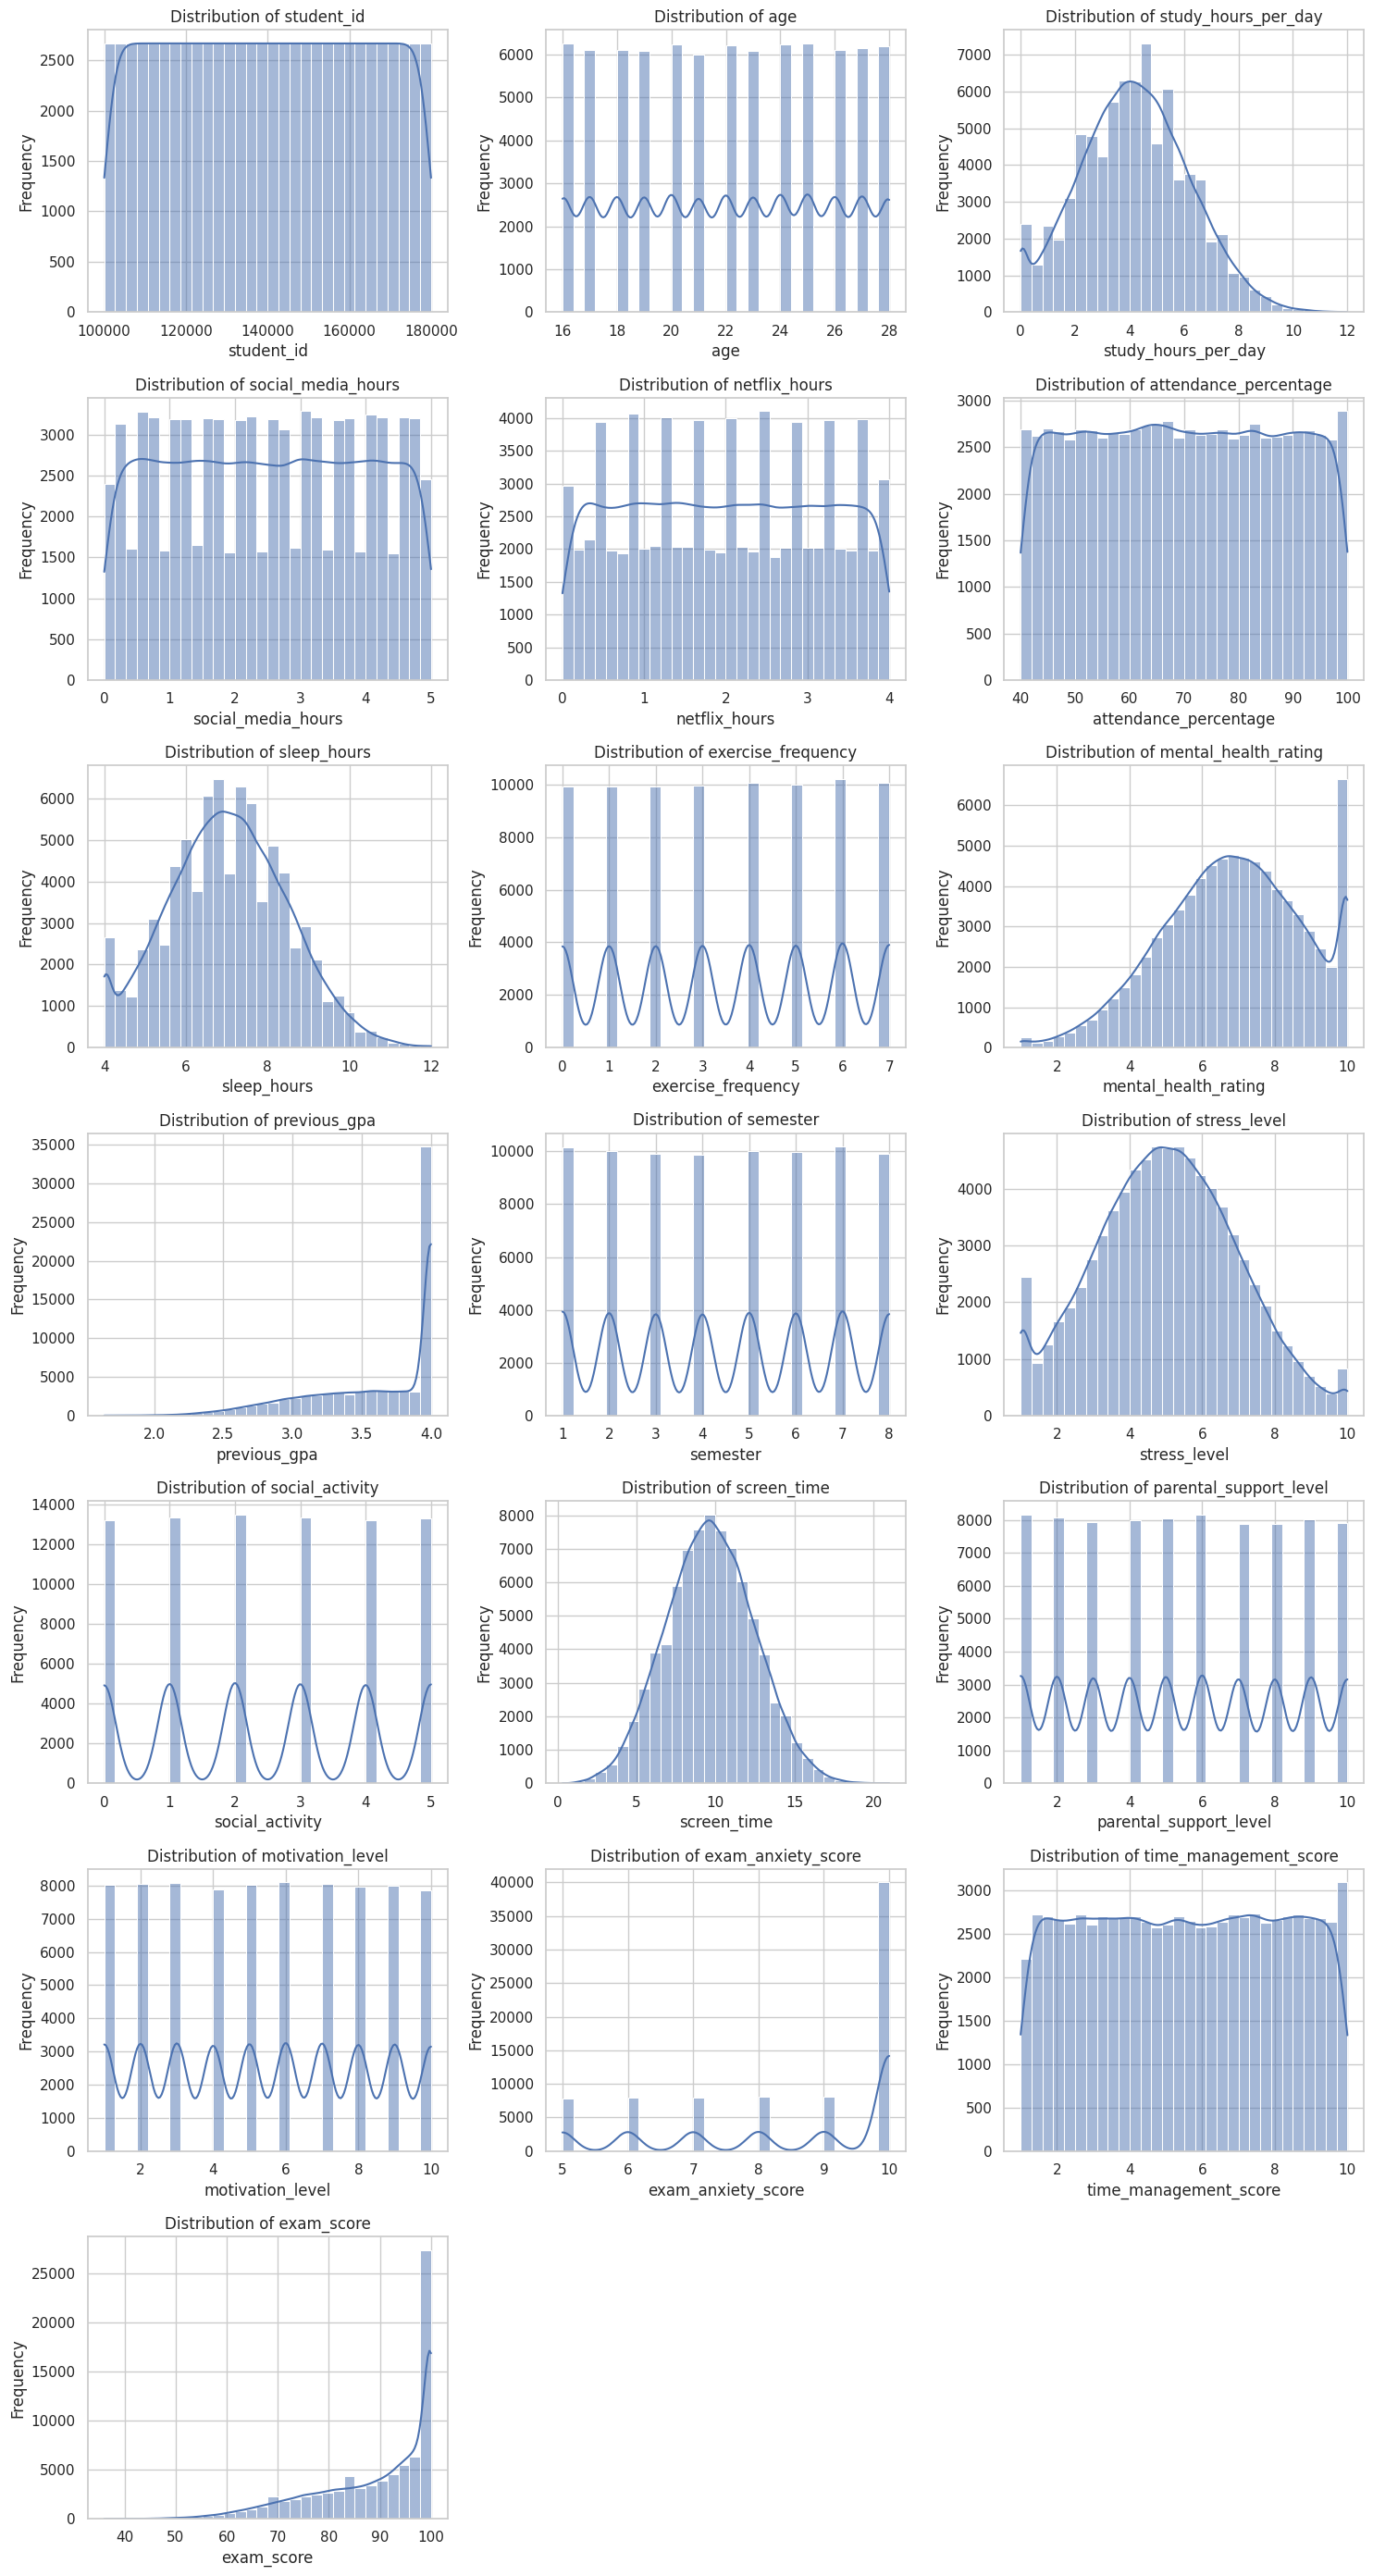

In [29]:
import math
# Numerical columns list (agar already defined nahi hai to define kar lo)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n = len(num_cols)  # Number of numerical columns
cols = 3           # Number of subplot columns (aap change kar sakte hain)
rows = math.ceil(n / cols)  # Rows calculated dynamically

plt.figure(figsize=(15, rows * 4))  # Figure height dynamically adjusted

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Step 10: Plot Count of Categorical Columns

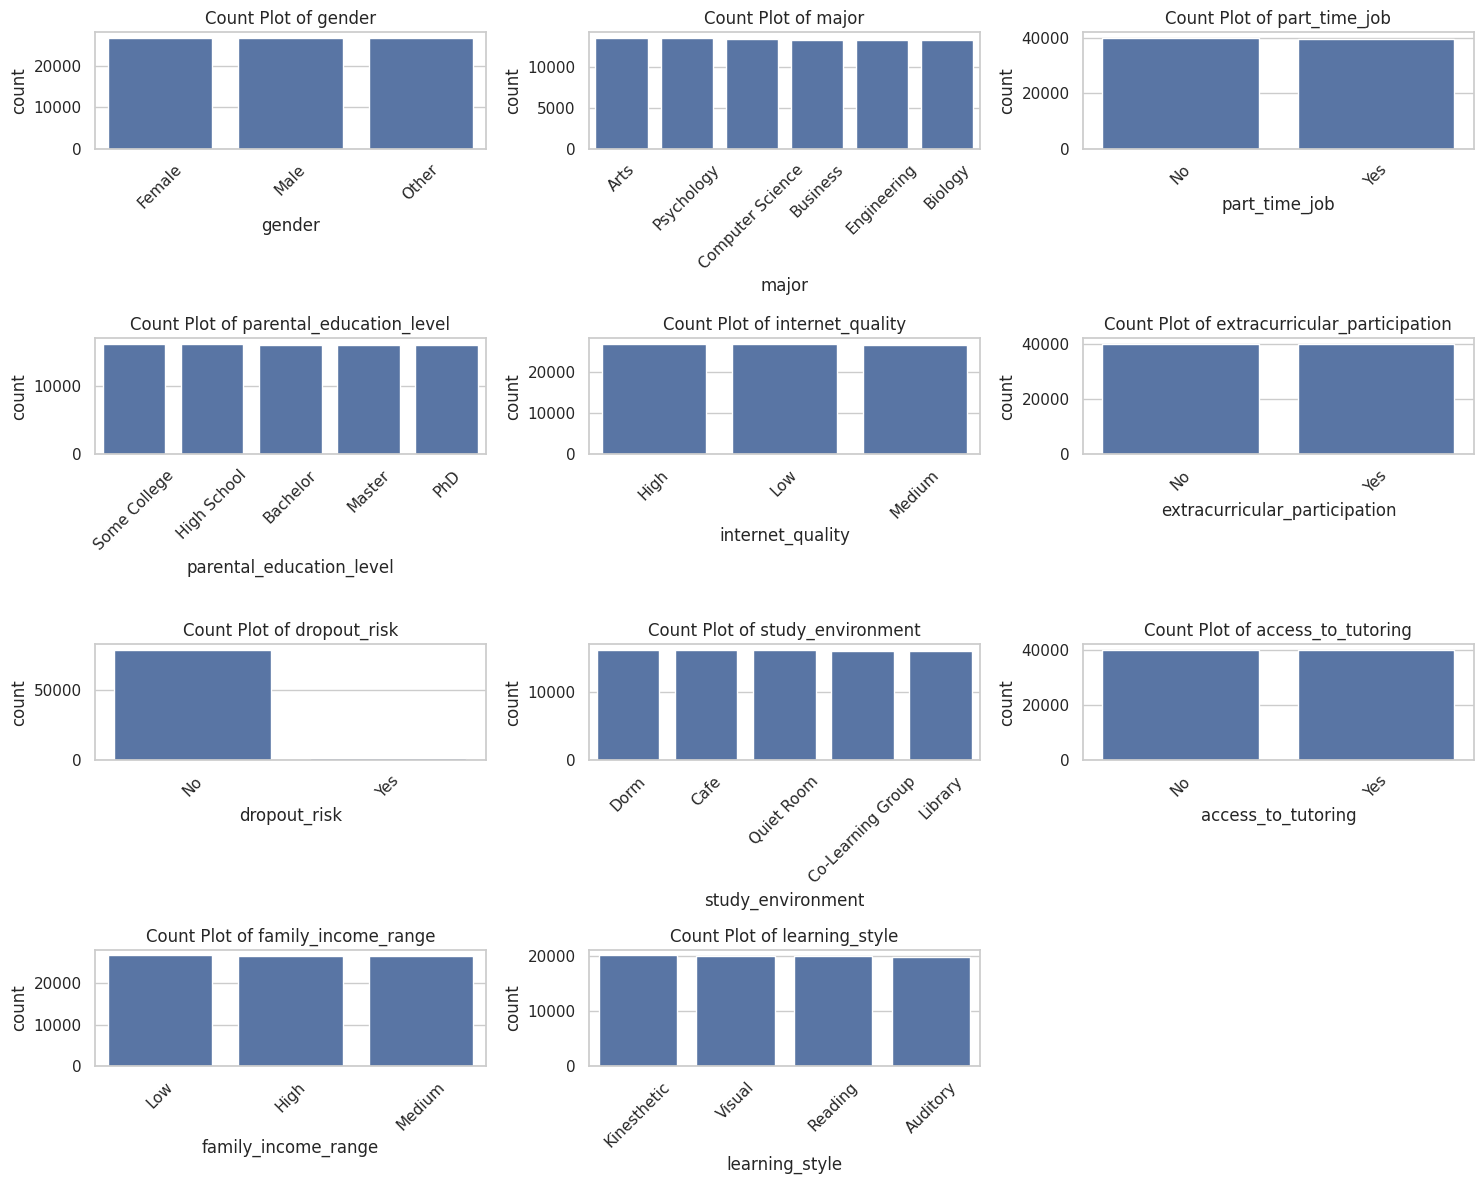

In [31]:
# Categorical columns list banayein (agar define nahi kiya hai to)
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)  # Adjust grid size (4 rows x 3 cols)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()


Step 11: Correlation Heatmap for Numerical Columns

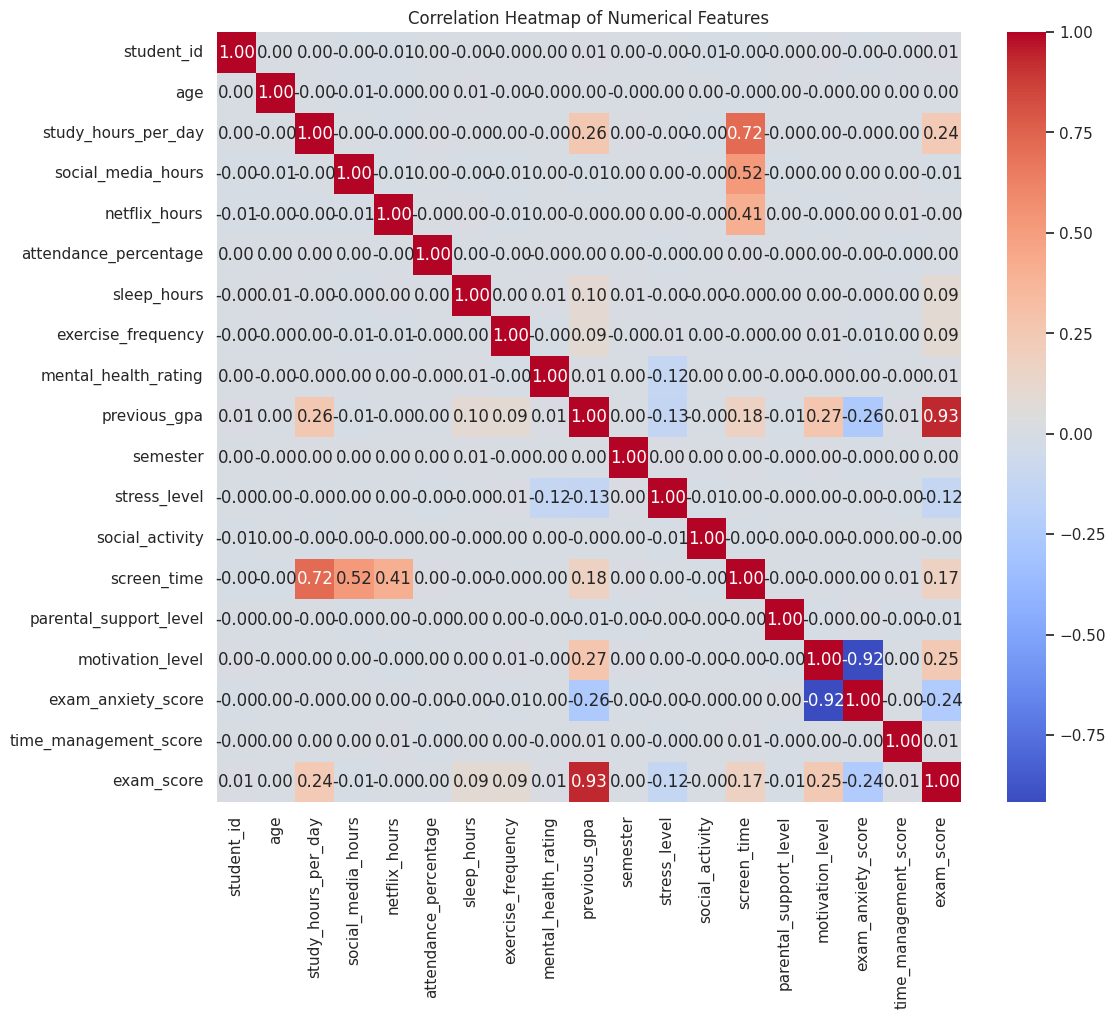

In [32]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Step 12: Example Analysis - Average Exam Score by Gender


In [34]:
avg_score_by_gender = df.groupby('gender', observed=True)['exam_score'].mean()
print("Average Exam Score by Gender:")
print(avg_score_by_gender)


Average Exam Score by Gender:
gender
Female    89.108444
Male      89.152034
Other     89.163665
Name: exam_score, dtype: float64


Step 13: Boxplot of Exam Scores by Dropout Risk

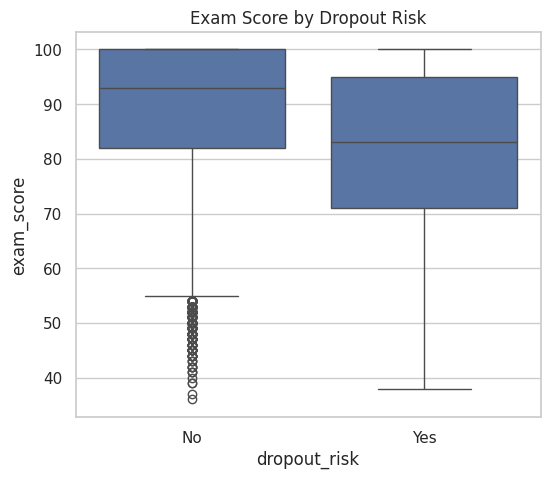

In [35]:
# Boxplot for exam score by dropout risk
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='dropout_risk', y='exam_score')
plt.title("Exam Score by Dropout Risk")
plt.show()


Step 14:Feature Engineering

In [56]:
df['psychological_distress'] = df['stress_level'] + df['exam_anxiety_score']


Step 15: Data Preparation for Modeling
Categorical columns encode

Features or target define

In [57]:
X = df.drop(['dropout_risk', 'exam_score', 'student_id'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# Classification target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_class = le.fit_transform(df['dropout_risk'])

# Regression target
y_reg = df['exam_score']


Step 16: Split Data into Train and Test Sets



In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


Step 17: Build and Train Logistic Regression Model (Dropout Risk Prediction)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_class)

y_pred_class = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15691
           1       1.00      1.00      1.00       309

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



Step 18: Build and Train Random Forest Regressor (Exam Score Prediction)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train_reg)

y_pred_reg = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4.282267231139235
R2 Score: 0.8645540291906769


Step 21: Feature Importance Visualization

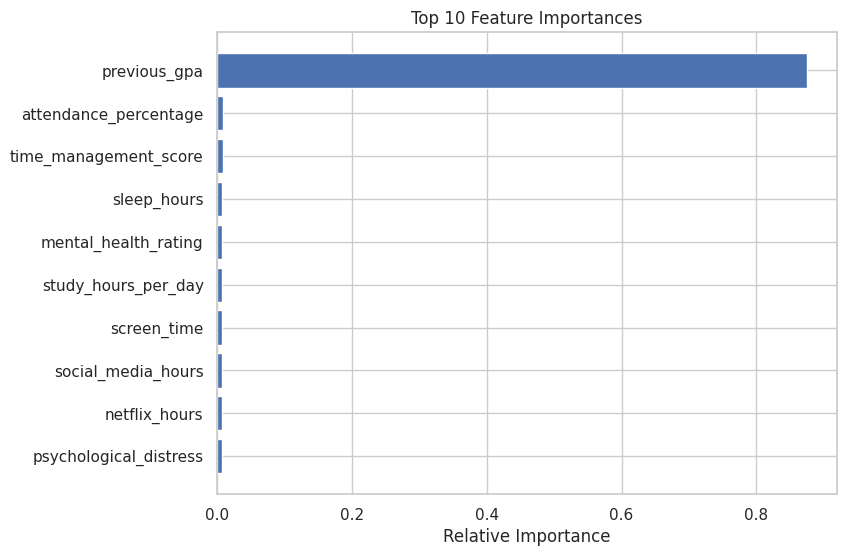

In [62]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
